In [2]:
import pandas as pd
import numpy as np

In [3]:
from time import time

In [4]:
import visuals as vs

In [5]:
from IPython.display import display 

In [6]:
%matplotlib inline

In [7]:
data = pd.read_csv("census.csv")

In [8]:
data.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [9]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [10]:
income_raw = data['income']
features_raw = data.drop(['income'], axis = 1)

In [11]:
features_raw.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States


In [12]:
#finding if any null value or not
data.notnull()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,True,True,True,True,True,True,True,True,True,True,True,True,True,True
45218,True,True,True,True,True,True,True,True,True,True,True,True,True,True
45219,True,True,True,True,True,True,True,True,True,True,True,True,True,True
45220,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Plot all numerical features to see if all are normal or not.If not take log and remove skewness.
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

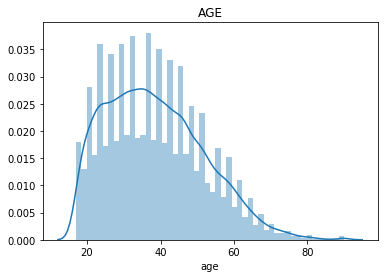

In [15]:
plt.title("AGE")
sns.distplot(features_raw['age'])

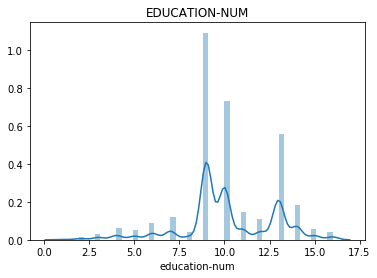

In [16]:
plt.title("EDUCATION-NUM")
sns.distplot( features_raw['education-num'])

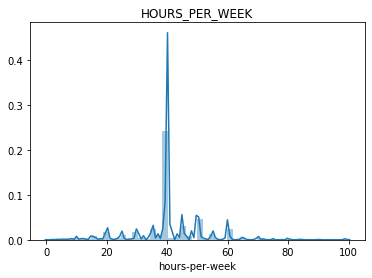

In [17]:
plt.title("HOURS_PER_WEEK")
sns.distplot( features_raw['hours-per-week'])

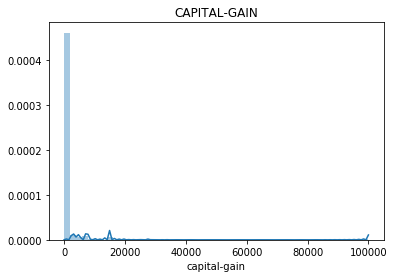

In [18]:
plt.title("CAPITAL-GAIN")
sns.distplot( features_raw['capital-gain'])

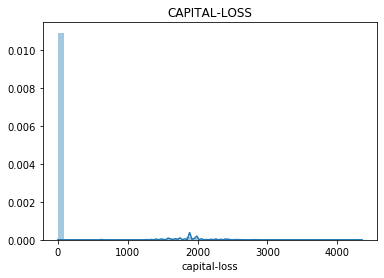

In [19]:
plt.title("CAPITAL-LOSS")
sns.distplot( features_raw['capital-loss'])

In [20]:
skewed=['capital-loss','capital-gain']

In [21]:
def log_fn(data):
    for num in features_raw['capital-loss','capital-gain']:
        return np.log(num)  


In [22]:
features_raw.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


(array([4.3094e+04, 2.3000e+01, 2.8000e+01, 6.3900e+02, 1.1250e+03,
        2.8400e+02, 1.8000e+01, 2.0000e+00, 8.0000e+00, 1.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

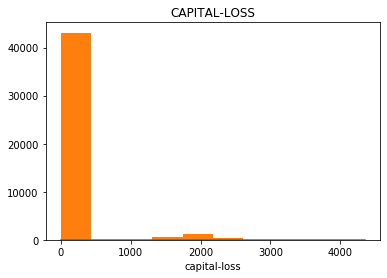

In [23]:
plt.title("CAPITAL-LOSS")
sns.distplot( features_raw['capital-loss'])
plt.hist( features_raw['capital-loss'])

(array([41432.,     0.,     0.,     0.]),
 array([0.   , 0.5  , 1.   , 1.5  , 2.205]),
 <a list of 4 Patch objects>)

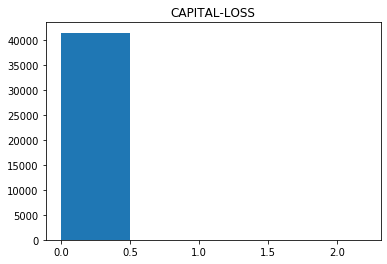

In [24]:
n_bins = [0,0.5,1.0,1.5,2.205]
plt.title("CAPITAL-LOSS")
plt.hist(features_raw['capital-gain'], bins = n_bins)

C:\Users\SEJAL GOYAL\Desktop\finding_donor\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


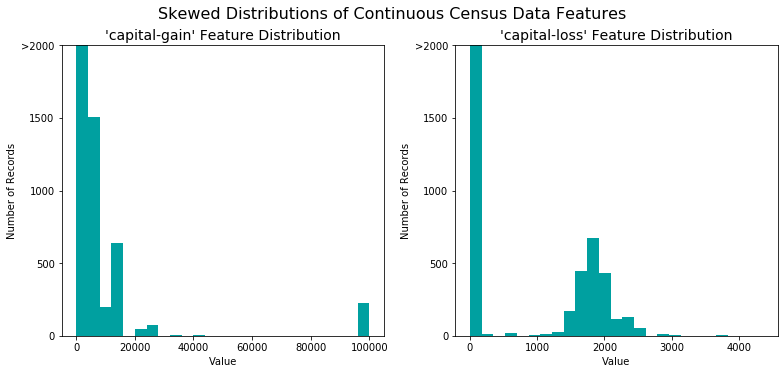

In [25]:
vs.distribution(features_raw)

In [26]:
#Normalizing all numerical features to be in range of (0,1)
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
num = ['age', 'education-num', 'hours-per-week','capital-gain','capital-loss']

In [28]:
numerical_raw = pd.DataFrame(data = features_raw)

In [29]:
numerical_raw[num] = scaler.fit_transform(features_raw[num])

In [30]:
numerical_raw.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


In [31]:
#Done with numerical features, now focussing on categorical features.

In [32]:
object_cols = [cname for cname in numerical_raw.columns if numerical_raw[cname].dtype == 'object']

In [33]:
object_cols

['workclass',
 'education_level',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [34]:
#One option, get dummies!!!!!!
######### final_features = pd.get_dummies(numerical_raw)##############

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
coder = OneHotEncoder(handle_unknown ='ignore', sparse=False)

In [37]:
OH_col = pd.DataFrame(coder.fit_transform(numerical_raw[object_cols]))

In [38]:
OH_col.index = numerical_raw[object_cols].index

In [39]:
pre_data = numerical_raw.drop(object_cols,axis= 1)

In [40]:
final_data = pd.concat([pre_data,OH_col], axis=1)

In [41]:
final_data.shape

(45222, 103)

In [42]:
final_data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,0,1,2,3,4,...,88,89,90,91,92,93,94,95,96,97
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
income = income_raw.map({'>50K' :1 , '<=50K' :0})

In [44]:
##Now we shuffle and splittt dataaa!!!!!!

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(final_data, income, test_size = 0.2, random_state = 0)

In [47]:
final_data.shape[0]

45222

In [48]:
X_train.shape[0]

36177

In [49]:
X_test.shape[0]

9045

In [50]:
####### Now we will apply models to the prepared dataset!!!!!!!!!!!

In [51]:
TP = sum(income)
TP

11208

In [52]:
total = income.count()
total

45222

In [53]:
FP=total - TP
FP

34014

In [54]:
accuracy = TP/total
accuracy

0.2478439697492371

In [55]:
precision = 1


In [56]:
recall = TP/(TP+FP)
recall 

0.2478439697492371

In [57]:

fscore =  (1  + (0.5*0.5)) * ( precision * recall / (( 0.5*0.5 * (precision))+ recall))


In [58]:
# Above was done assuming all the predictions were 1
#####Now making a common function to fit, predict and find score on dataset by different learning algos!!!!

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def base_model(learner, sample_size,X_train, X_test, y_train, y_test):
    
    results = {}
    
    start = time()
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time()
    
    #results['fit_time'] = end - start
    
    start = time()
    prediction_test = learner.predict(X_test)
    prediction_train = learner.predict(X_train[:300])
    end = time()
    
    #results['prediction_time'] = end-start

    results['accuracy_train'] = accuracy_score(prediction_train, y_train[:300])
    results['fbeta_train'] = fbeta_score(prediction_train, y_train[:300],beta=0.5)
    results['accuracy_test'] = accuracy_score(prediction_test, y_test)
    results['fbeta_test'] = fbeta_score(prediction_test, y_test,beta=0.5)
    
    print("{} trained on {} samples with the following scores: ".format(learner.__class__.__name__, sample_size))
    print(results)
    print("\n")    
    
    return results

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [91]:
clf_A = RandomForestClassifier(random_state = 42)
clf_B = GaussianNB()
clf_C = SVC(random_state = 42)
clf_D = KNeighborsClassifier()
clf_E = LogisticRegression(random_state = 42)

In [92]:
samples_100 = len(X_train)
samples_10 = int(0.1*len(X_train))
samples_1 = int(0.01*len(X_train))

In [93]:
# For a particular sample size, use all the models!!!!!!!!!!!!!!

In [81]:
samples_1 = int(0.01*len(X_train))
for clf in [clf_A,clf_B,clf_C,clf_D,clf_E]:
    base_model(clf, samples_1 ,X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RandomForestClassifier trained on 361 samples with the following scores: 
{'accuracy_train': 0.98, 'fbeta_train': 0.9322033898305083, 'accuracy_test': 0.8086235489220563, 'fbeta_test': 0.5312323079826383}


GaussianNB trained on 361 samples with the following scores: 
{'accuracy_train': 0.4, 'fbeta_train': 0.6666666666666666, 'accuracy_test': 0.3517965726920951, 'fbeta_test': 0.6234961501443697}




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


SVC trained on 361 samples with the following scores: 
{'accuracy_train': 0.76, 'fbeta_train': 0.0, 'accuracy_test': 0.7562189054726368, 'fbeta_test': 0.0}


KNeighborsClassifier trained on 361 samples with the following scores: 
{'accuracy_train': 0.8666666666666667, 'fbeta_train': 0.6176470588235294, 'accuracy_test': 0.8048645660585959, 'fbeta_test': 0.5009541984732824}


LogisticRegression trained on 361 samples with the following scores: 
{'accuracy_train': 0.8433333333333334, 'fbeta_train': 0.5255255255255254, 'accuracy_test': 0.8108347153123272, 'fbeta_test': 0.49740234750817774}




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
samples_10 = int(0.1*len(X_train))
for clf in [clf_A,clf_B,clf_C,clf_D,clf_E]:
    base_model(clf, samples_10 ,X_train, X_test, y_train, y_test)

RandomForestClassifier trained on 3617 samples with the following scores: 
{'accuracy_train': 0.9933333333333333, 'fbeta_train': 0.9776536312849161, 'accuracy_test': 0.8330569375345495, 'fbeta_test': 0.5857129394025068}


GaussianNB trained on 3617 samples with the following scores: 
{'accuracy_train': 0.38666666666666666, 'fbeta_train': 0.654981549815498, 'accuracy_test': 0.3673852957435047, 'fbeta_test': 0.6450351837372947}




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 3617 samples with the following scores: 
{'accuracy_train': 0.8333333333333334, 'fbeta_train': 0.46012269938650313, 'accuracy_test': 0.8226644555002764, 'fbeta_test': 0.4916430456455869}


KNeighborsClassifier trained on 3617 samples with the following scores: 
{'accuracy_train': 0.86, 'fbeta_train': 0.6358381502890174, 'accuracy_test': 0.8182421227197346, 'fbeta_test': 0.5534081267087774}


LogisticRegression trained on 3617 samples with the following scores: 
{'accuracy_train': 0.8366666666666667, 'fbeta_train': 0.5341246290801187, 'accuracy_test': 0.8369264787175235, 'fbeta_test': 0.5778369131343851}




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
samples_100 = len(X_train)
for clf in [clf_A,clf_B,clf_C,clf_D,clf_E]:
    base_model(clf, samples_100 ,X_train, X_test, y_train, y_test)

RandomForestClassifier trained on 36177 samples with the following scores: 
{'accuracy_train': 0.9733333333333334, 'fbeta_train': 0.9180790960451978, 'accuracy_test': 0.843338861249309, 'fbeta_test': 0.6300055876327062}


GaussianNB trained on 36177 samples with the following scores: 
{'accuracy_train': 0.5933333333333334, 'fbeta_train': 0.702127659574468, 'accuracy_test': 0.6082918739635158, 'fbeta_test': 0.7198934529650918}




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples with the following scores: 
{'accuracy_train': 0.8366666666666667, 'fbeta_train': 0.48632218844984804, 'accuracy_test': 0.8300718629076838, 'fbeta_test': 0.5403846153846154}


KNeighborsClassifier trained on 36177 samples with the following scores: 
{'accuracy_train': 0.8733333333333333, 'fbeta_train': 0.675287356321839, 'accuracy_test': 0.8201216141514649, 'fbeta_test': 0.5878804751299183}




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 36177 samples with the following scores: 
{'accuracy_train': 0.85, 'fbeta_train': 0.5637982195845698, 'accuracy_test': 0.8483139856274184, 'fbeta_test': 0.6231788701945671}




In [68]:
###### all our models have been fit to corresponding learners!!!!!!!!!!!!

In [95]:
######### RandomForestClassifier selected ##################
######### Now apply GridsearchCv ####################

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [126]:
clf = clf_A

In [127]:
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [128]:
print("For unoptimized model: \n")
print("The accuracy score on test data: {}" .format(accuracy_score(y_test,predictions)))
print("The fbeta score on test data: {}" .format(fbeta_score(y_test,predictions,beta = 0.5)))

For unoptimized model: 

The accuracy score on test data: 0.843338861249309
The fbeta score on test data: 0.684924572238534


In [129]:
parameters = {'n_estimators':[5,7,10,12],'max_depth':[4,5,7,9]}


In [130]:
scorer = make_scorer(fbeta_score, beta = 0.5)

In [131]:
grid_obj = GridSearchCV(clf,parameters,scoring = scorer)


In [133]:
grid_fit = grid_obj.fit(X_train ,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [135]:
best_clf = grid_obj.best_estimator_
best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [137]:
best_clf.fit(X_train,y_train)
best_predictions = best_clf.predict(X_test)

In [138]:
print("For Optimized model: \n")
print("The accuracy score on test data: {}" .format(accuracy_score(y_test,best_predictions)))
print("The fbeta score on test data: {}" .format(fbeta_score(y_test,best_predictions,beta = 0.5)))

For Optimized model: 

The accuracy score on test data: 0.8465450525152017
The fbeta score on test data: 0.704461188853008


In [139]:
grid_obj.best_score_

0.7279338752196485

In [140]:
grid_obj.best_params_

{'max_depth': 9, 'n_estimators': 7}

In [159]:
importances = clf.feature_importances_
importances

array([2.35016395e-01, 9.35391603e-02, 1.05611126e-01, 3.67762808e-02,
       1.09809260e-01, 4.97904523e-03, 6.17719939e-03, 1.09871202e-02,
       6.01332038e-03, 8.86748161e-03, 5.14415135e-03, 5.98357831e-05,
       1.02116160e-03, 1.34665099e-03, 7.57172001e-04, 3.28139102e-04,
       5.32900383e-04, 1.27645642e-03, 7.46102803e-04, 2.29143573e-03,
       2.74824215e-03, 7.94216047e-03, 1.78356947e-03, 5.73373291e-03,
       4.77964034e-03, 1.04338966e-04, 5.48303584e-03, 4.72883749e-03,
       7.99141727e-03, 2.94996843e-04, 9.94894044e-02, 1.30857195e-03,
       2.70407474e-02, 1.62356514e-03, 1.90556685e-03, 5.97314516e-03,
       5.48211636e-05, 7.21994607e-03, 1.51211480e-02, 4.64280272e-03,
       3.33542936e-03, 3.76476512e-03, 8.37623912e-03, 3.50187382e-04,
       1.37330679e-02, 3.37121505e-03, 6.87566326e-03, 4.01796532e-03,
       3.91342679e-03, 1.35081395e-02, 1.07520286e-02, 1.49835336e-03,
       1.45396801e-02, 5.77380179e-03, 7.17169767e-03, 1.33801387e-03,
      

In [160]:
####### In above code, we have found the importance of each feature of the dataset for predioction !!!! All values sumup to 1!!!!!

In [161]:
###Top 5 features are: Age, Hours per week , marital status, capital gain and education num

In [162]:
## Now we ll train on theese features only!!!!!!!

In [176]:
index1 = np.argsort(importances)[:5]

In [192]:
X_train[X_train.columns.values[index1]]

,71,72,84,31,6
13181,0.0,0.0,0.0,0.0,0.0
10342,0.0,0.0,0.0,0.0,0.0
20881,0.0,0.0,0.0,0.0,0.0
24972,0.0,0.0,0.0,0.0,0.0
43867,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
30403,0.0,0.0,0.0,0.0,0.0
21243,0.0,0.0,0.0,0.0,0.0
42613,0.0,0.0,0.0,0.0,0.0
43567,0.0,0.0,0.0,0.0,0.0


In [187]:
X_reduced_train = X_train[X_train.columns.values[index1]]
X_reduced_test = X_test[X_test.columns.values[index1]]

In [188]:
from sklearn import clone

In [189]:
clone_clf = clone(best_clf).fit(X_reduced_train, y_train)
predictions2 = clone_clf.predict(X_reduced_test)

In [190]:
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, predictions2)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions2, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8465
F-score on testing data: 0.7045

Final Model trained on reduced data
------
Accuracy on testing data: 0.7562
F-score on testing data: 0.0000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
